In [90]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/naren/OneDrive/Desktop/aicte internship/DoctorVisits-DA.csv")

# Check for duplicates
duplicates = df.duplicated()
print(f"Number of duplicates: {duplicates.sum()}")


Number of duplicates: 0


In [92]:
df.head()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


In [94]:
df['age']=df['age']*100

In [96]:
# Count people by their number of illnesses
illness_counts = df['illness'].value_counts()
print(illness_counts)

illness
1    1638
0    1554
2     946
3     542
4     274
5     236
Name: count, dtype: int64


gender
female    4353
male      3079
Name: illness, dtype: int64


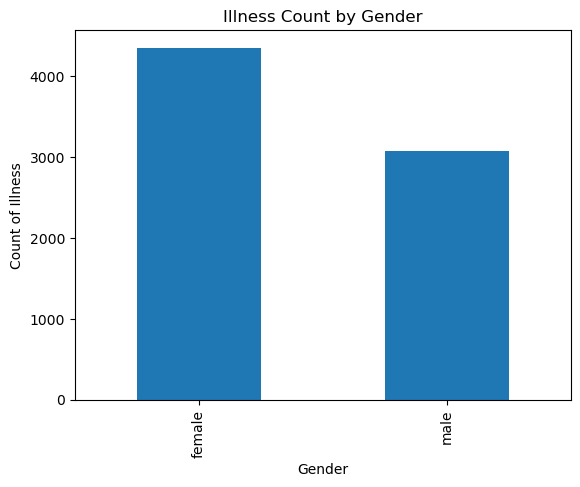

In [98]:
# Gender-wise illness count
gender_illness = df.groupby('gender')['illness'].sum()
print(gender_illness)

# Visualization
import matplotlib.pyplot as plt

gender_illness.plot(kind='bar', title='Illness Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Illness')
plt.show()


In [100]:
max_income = df['income'].max()
min_income = df['income'].min()
median_income = df['income'].median()

print(f"Max Income: {max_income}, Min Income: {min_income}, Median Income: {median_income}")


Max Income: 1.5, Min Income: 0.0, Median Income: 0.55


gender
female    2636
male      1837
Name: reduced, dtype: int64


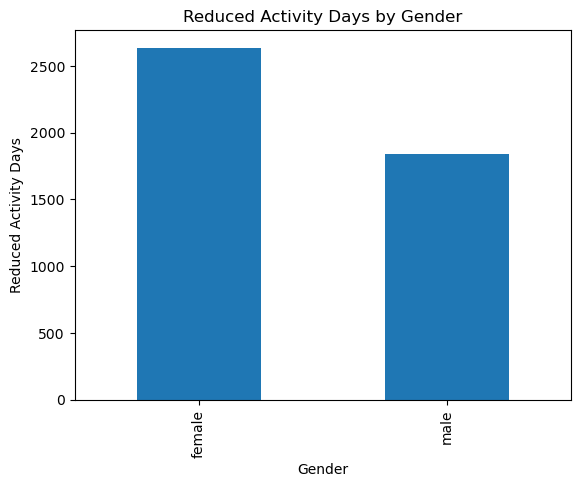

In [102]:
# Group by gender and sum reduced activity days
activity_reduction = df.groupby('gender')['reduced'].sum()
print(activity_reduction)

# Bar chart
activity_reduction.plot(kind='bar', title='Reduced Activity Days by Gender')
plt.xlabel('Gender')
plt.ylabel('Reduced Activity Days')
plt.show()

In [105]:
df.isnull().value_counts()

Unnamed: 0  visits  gender  age    income  illness  reduced  health  private  freepoor  freerepat  nchronic  lchronic
False       False   False   False  False   False    False    False   False    False     False      False     False       5190
Name: count, dtype: int64

            Unnamed: 0    visits       age    income   illness   reduced  \
Unnamed: 0    1.000000 -0.521645 -0.016322  0.074632 -0.290047 -0.245314   
visits       -0.521645  1.000000  0.124537 -0.076840  0.223552  0.418954   
age          -0.016322  0.124537  1.000000 -0.271073  0.204984  0.094745   
income        0.074632 -0.076840 -0.271073  1.000000 -0.148812 -0.047545   
illness      -0.290047  0.223552  0.204984 -0.148812  1.000000  0.218116   
reduced      -0.245314  0.418954  0.094745 -0.047545  0.218116  1.000000   
health       -0.194966  0.193272  0.018616 -0.085790  0.360110  0.280208   

              health  
Unnamed: 0 -0.194966  
visits      0.193272  
age         0.018616  
income     -0.085790  
illness     0.360110  
reduced     0.280208  
health      1.000000  


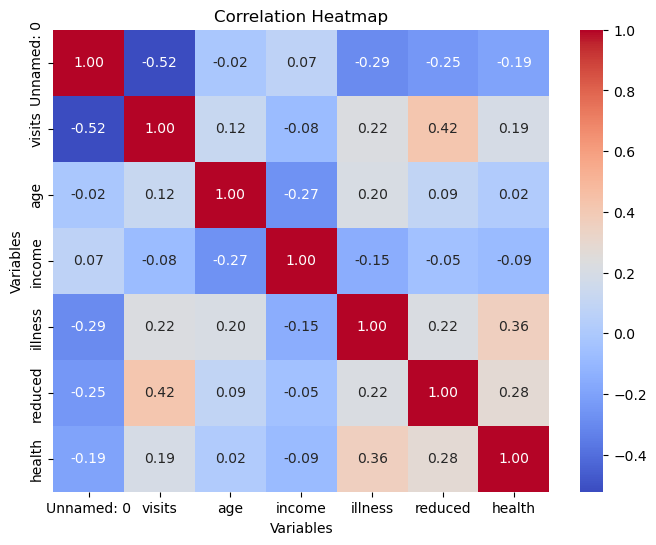

In [108]:
# Compute correlation matrix for numeric columns only
correlation_matrix = df.select_dtypes(include=['number']).corr()
print(correlation_matrix)

# Plot heatmap for the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()


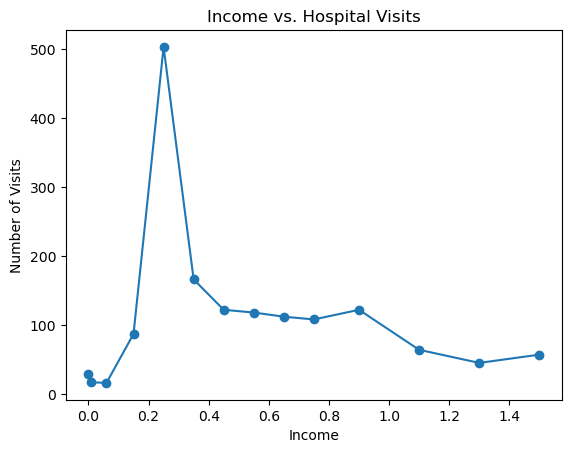

In [109]:
income_visits = df.groupby('income')['visits'].sum()

income_visits.plot(title='Income vs. Hospital Visits', marker='o')
plt.xlabel('Income')
plt.ylabel('Number of Visits')
plt.show()


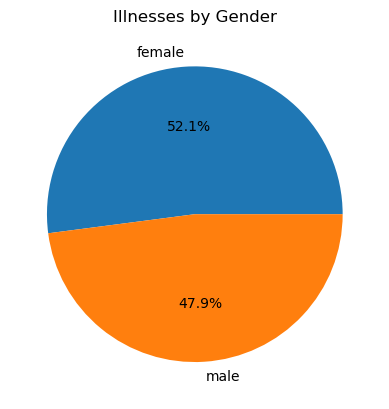

In [112]:
# Count illnesses by gender
gender_affected = df.groupby('gender')['illness'].count()

# Pie chart
gender_affected.plot(kind='pie', autopct='%1.1f%%', title='Illnesses by Gender')
plt.ylabel('')
plt.show()


In [114]:
gov_insurance = df[df['private'] == 'no']
private_insurance = df[df['private'] == 'yes']

gov_percent = len(gov_insurance) / len(df) * 100
private_percent = len(private_insurance) / len(df) * 100

print(f"Government Insurance: {gov_percent}%, Private Insurance: {private_percent}%")


Government Insurance: 55.722543352601164%, Private Insurance: 44.27745664739884%


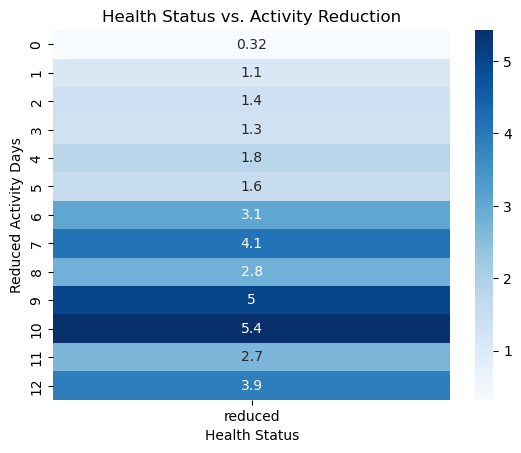

In [116]:
health_activity_corr = df.pivot_table(index='health', values='reduced', aggfunc='mean')

sns.heatmap(health_activity_corr, annot=True, cmap='Blues')
plt.title('Health Status vs. Activity Reduction')
plt.xlabel('Health Status')
plt.ylabel('Reduced Activity Days')
plt.show()


C:\Users\naren\AppData\Local\Temp\ipykernel_17364\728579422.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_illness = df.groupby('Age_Group')['illness'].sum()


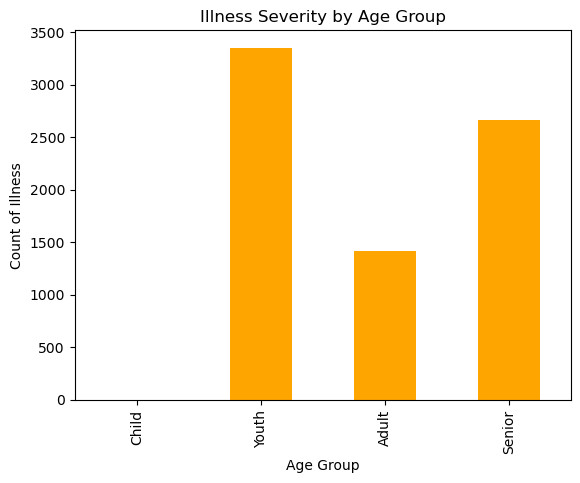

In [117]:
# Categorize age into groups
bins = [0, 18, 35, 60, 100]
labels = ['Child', 'Youth', 'Adult', 'Senior']
df['Age_Group'] = pd.cut(df['age'], bins=bins, labels=labels)

age_illness = df.groupby('Age_Group')['illness'].sum()
age_illness.plot(kind='bar', title='Illness Severity by Age Group', color='orange')
plt.xlabel('Age Group')
plt.ylabel('Count of Illness')
plt.show()


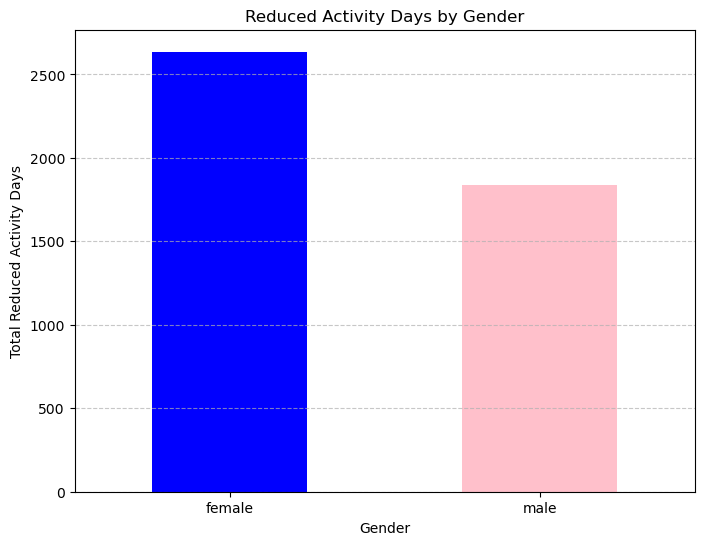

In [139]:
# Group by gender and sum up the reduced activity days
reduced_activity_by_gender = df.groupby('gender')['reduced'].sum()

# Plot a bar chart
plt.figure(figsize=(8, 6))
reduced_activity_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title('Reduced Activity Days by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Reduced Activity Days')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
